In [1]:
!pip install --upgrade pandas numpy matplotlib tensorflow tcav

  Using cached numpy-1.23.2-cp39-cp39-win_amd64.whl (14.7 MB)


In [2]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

import tcav.activation_generator as act_gen
import tcav.cav as cav
import tcav.model  as model
import tcav.tcav as tcav
import tcav.utils as utils
import tcav.utils_plot as utils_plot
import os 

### О данных

Поскольку мы будем проверять важность концептуальных полос для изображений для tiger, нам понадобится набор данных изображений для tigers. Данные собираются из коллекции ImageNet и предоставляются в репозитории проекта: https://github.com/PacktPublishing/Applied-Machine-Learning-Explainability-Techniques/tree/main/Chapter08/images/tiger. Изображения обрабатываются случайным образом и собираются с помощью скрипта сбора данных, предоставленного в репозитории TCAV: https://github.com/tensorflow/tcav/tree/master/tcav/tcav_examples/image_models/imagenet . Концептуальные изображения подготовлены с использованием набора данных Broden: http://netdissect.csail.mit.edu/data/broden1_224.zip . Пожалуйста, ознакомьтесь с исследовательской работой, которая привела к созданию этого набора данных: https://github.com/CSAILVision/NetDissect . Я подготовил изображения для концепции stripe. Цель этой тетради - описать образ тигра в отношении полос. Пожалуйста, ознакомьтесь с текстурными изображениями Broden dataset, предоставленными по адресу https://github.com/PacktPublishing/Applied-Machine-Learning-Explainability-Techniques/tree/main/Chapter08/concepts/broden_concepts чтобы узнать больше. Позже вы можете поэкспериментировать с другими концепциями или другими изображениями, чтобы поиграть с TCAVs! TCAV также требует некоторых случайных наборов данных для определения статистической значимости понятий, извлеченных из примеров изображений. Я также предоставил несколько примеров случайных изображений в репозитории проекта, чтобы упростить запуск tutorial notebook! Теперь давайте продолжим.

In [3]:
# Define the target class and concepts
target = 'tiger'  
concepts = ['honeycombed', 'striped'] 

source_dir - где живут образы понятий, целевого класса и случайных образов (отрицательные образцы при изучении CAVS). Каждый из них должен быть вложенной папкой в этом каталоге.

Обратите внимание, что каталоги случайных изображений могут иметь любое имя. В этом примере мы используем random500_0, random500_1,.. по произвольной причине.

Вам нужно примерно 50-200 изображений для каждой концепции и целевого класса (10-20 изображений также, как правило, работают, но 200 довольно безопасны).

cav_dir - каталог для хранения CAVS (нет, если вы не хотите хранить)

In [9]:
# Create teh necessary directories for the data and the activation files
activation_dir =  'C:\\Users\\1\\Downloads\\activations'
cav_dir = 'C:\\Users\\1\\Downloads\\cavs'
source_dir = 'C:\\Users\\1\\Downloads\\images'


utils.make_dir_if_not_exists(activation_dir)
utils.make_dir_if_not_exists(cav_dir)

In [10]:
# set the regularizer penalty parameter for linear classifier to get CAVs. 
alphas = [0.1]

About the model

В этом уроке мы будем использовать предварительно обученную модель imagenet (GoogLeNet). Файлы модели предоставляются в репозитории кода: https://github.com/PacktPublishing/Applied-Machine-Learning-Explainability-Techniques/tree/main/Chapter08/models/inception5h. Вы также можете попробовать использовать другие модели.

In [11]:
model_to_run = 'GoogleNet'
sess = utils.create_session()
GRAPH_PATH = "C:\\Users\\1\\Downloads\\tensorflow_inception_graph.pb"
LABEL_PATH = "C:\\Users\\1\\Downloads\\imagenet_comp_graph_label_strings.txt"

trained_model = model.GoogleNetWrapper_public(sess,
                                              GRAPH_PATH,
                                              LABEL_PATH)

Далее нам нужно будет сгенерировать Векторы активации концепции (CAVS)

In [12]:
act_generator = act_gen.ImageActivationGenerator(trained_model, source_dir, activation_dir, max_examples=100)

### Model Explainability using TCAV

TCAV в настоящее время используются для объяснения нейронных сетей и внутренних слоев нейронной сети. Таким образом, это не зависит от модели, а скорее метод объяснения, ориентированный на модель. Итак, давайте определим уровень узкого места в сети.


In [13]:
bottlenecks = [ 'mixed4c']

Далее давайте начнем процесс ведения журнала...

Оригинальный документ TCAV: https://arxiv.org/abs/1711.11279 упомянул об использовании по крайней мере 500 случайных экспериментов для оценки статистической значимости важности понятия, основанной на оценке важности понятия на случайных изображениях. Но в этом уроке мы просто проведем 15 экспериментов, чтобы ускорить работу ноутбука.

In [19]:
num_random_exp=15
 
mytcav = tcav.TCAV(sess,
                   target,
                   concepts,
                   bottlenecks,
                   act_generator,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=num_random_exp)

INFO:tensorflow:mixed4c ['honeycombed', 'random500_0'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_1'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_2'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_3'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_4'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_5'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_6'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_7'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_8'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_9'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_10'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_11'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_12'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_13'] tiger 0.1
INFO:tensorflow:mixed4c ['honeycombed', 'random500_14'] tiger 0.1
INFO:tensorflow:mixe

In [20]:
results = mytcav.run(run_parallel=False)

INFO:tensorflow:running 240 params
INFO:tensorflow:Running param 0 of 240
INFO:tensorflow:running tiger ['honeycombed', 'random500_0']
INFO:tensorflow:Loaded C:\Users\1\Downloads\activations\acts_honeycombed_mixed4c shape (28, 14, 14, 512)
INFO:tensorflow:Loaded C:\Users\1\Downloads\activations\acts_random500_0_mixed4c shape (30, 14, 14, 512)
INFO:tensorflow:Loaded C:\Users\1\Downloads\activations\acts_tiger_mixed4c shape (42, 14, 14, 512)
INFO:tensorflow:CAV already exists: C:\Users\1\Downloads\cavs\honeycombed-random500_0-mixed4c-linear-0.1.pkl
INFO:tensorflow:CAV accuracies: {'honeycombed': 1.0, 'random500_0': 0.7777777777777778, 'overall': 0.8947368421052632}
INFO:tensorflow:Running param 1 of 240
INFO:tensorflow:running tiger ['honeycombed', 'random500_1']
INFO:tensorflow:Loaded C:\Users\1\Downloads\activations\acts_honeycombed_mixed4c shape (28, 14, 14, 512)
INFO:tensorflow:Loaded C:\Users\1\Downloads\activations\acts_random500_1_mixed4c shape (5, 14, 14, 512)
INFO:tensorflow:Loa

Class = tiger
  Concept = honeycombed
    Bottleneck = mixed4c. TCAV Score = 0.63 (+- 0.13), random was 0.50 (+- 0.16). p-val = 0.003 (significant)
  Concept = striped
    Bottleneck = mixed4c. TCAV Score = 0.64 (+- 0.10), random was 0.50 (+- 0.16). p-val = 0.002 (significant)
{'mixed4c': {'bn_vals': [0.6317460317460317, 0.6365079365079364], 'bn_stds': [0.12920673920615064, 0.10304020550550785], 'significant': [True, True]}}


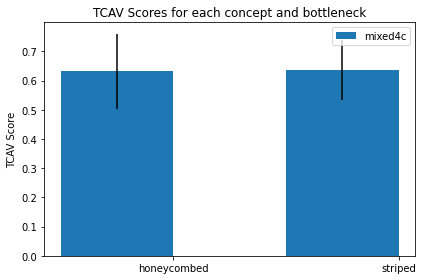

In [21]:
utils_plot.plot_results(results, num_random_exp=num_random_exp)

Результаты получены такими, потому что модель было обучена на других и большем колличестве случаных выборок, в данном случае сделан упор на техническую реализацию.

Как вы можете видеть из приведенного выше изображения, важность концепции для концепции striped значительно выше, чем honeycombed.

Этот пример является учебным пособием, на которое ссылаются из https://github.com/tensorflow/tcav/blob/master/Run_TCAV_on_colab.ipynb для аналогичной проблемы. Но для того, чтобы глубже понять этот урок, вы можете попробовать выполнить простое упражнение. Вы можете использовать набор данных imagenet и определить важность концепции вода для кораблей или облака или небо для самолетов! Рассматривайте это как вызов и попробуйте, сможете ли вы решить эту проблему с помощью TCAV!